# Genetic Algorithm

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [4]:
# Define the objective function
def objective(LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range, w1, w2, w3):
    return w1*abs((LF-LF_lim)/LF_lim) + w2*abs((THS-THS_trim)/THS_range) + w3*abs((V-V_stab)/V_range) 

In [5]:
# Define the cost function
def calculate_cost(population, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range):
    costs = []
    for p in population:
        w1, w2, w3 = p
        f = objective(LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range, w1, w2, w3)
        costs.append(1/(f + 1e-10)) # Add a small constant to avoid division by zero
    return costs

In [6]:
# Define the genetic algorithm
def genetic_algorithm(population_size, generations, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range):
    # Define the initial population
    population = []
    for i in range(population_size):
        w1 = random.uniform(0, 1)
        w2 = random.uniform(0, 1)
        w3 = random.uniform(0, 1)
        population.append([w1, w2, w3])

    # Run the genetic algorithm for the defined number of generations
    for i in range(generations):
        # Evaluate the cost of the population
        costs = calculate_cost(population, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range)

        # Select parents for crossover
        parents = []
        for j in range(population_size):
            parent1 = population[random.randint(0, population_size-1)]
            parent2 = population[random.randint(0, population_size-1)]
            if costs[population.index(parent1)] < costs[population.index(parent2)]:
                parents.append(parent1)
            else:
                parents.append(parent2)

        # Create new population through crossover and mutation
        new_population = []
        for j in range(population_size):
            parent1 = parents[random.randint(0, population_size-1)]
            parent2 = parents[random.randint(0, population_size-1)]
            child = []
            for k in range(len(parent1)):
                if random.random() < 0.5:
                    child.append(parent1[k])
                else:
                    child.append(parent2[k])
            for k in range(len(child)):
                if random.random() < 0.1:
                    child[k] = random.uniform(0, 1)
            new_population.append(child)

        # Replace the old population with the new population
        population = new_population

    # Evaluate the cost of the final population
    costs = calculate_cost(population, LF, LF_lim, THS, THS_trim, THS_range, V, V_stab, V_range)

    # Return the weighting factors that result in the lowest cost
    best_weights = population[costs.index(min(costs))]
    return best_weights


In [7]:
# Set the input parameters
population_size = 200
generations = 100
#LF = -1.1
LF_lim = -1.0
#THS = 0.5
THS_trim = 0.0
THS_range = 1.0
#V = 350.0
V_stab = 350.0
V_range = 100.0


In [8]:
# Call the genetic algorithm function and store the costs
costs = {}
LF_bound = np.linspace(-1.5, -0.5, 10)
THS_bound = np.linspace(-1.0, 1.0, 10)
V_bound = np.linspace(300.0, 420.0, 10)

grid = []
for i in LF_bound:
    for j in THS_bound:
        for k in V_bound:
            grid.append([i,j,k])
#print(grid)

for ele in grid:
    best_weights = genetic_algorithm(population_size, generations, ele[0] , LF_lim, ele[1], THS_trim, THS_range, ele[2], V_stab, V_range)
    #Print the best weights
    #print("Best weights: ", best_weights)
    cost = 1/objective( ele[0] , LF_lim, ele[1], THS_trim, THS_range, ele[2], V_stab, V_range, *best_weights)
    costs[cost] = ele
#print(costs)

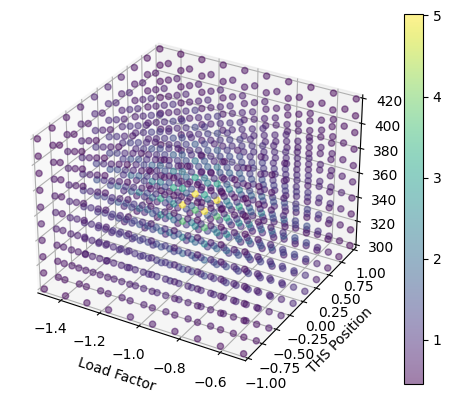

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = [c[0] for c in costs.values()]
y = [c[1] for c in costs.values()]
z = [c[2] for c in costs.values()]
c = list(costs.keys())
sc = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)
ax.set_xlabel('Load Factor')
ax.set_ylabel('THS Position')
ax.set_zlabel('Airspeed')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(300.0, 420.0)
fig.colorbar(sc)
plt.show()

# GA iteration 2


>0, new best f([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]) = -9.000
>0, new best f([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]) = -10.000
>0, new best f([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]) = -11.000
>0, new best f([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1]) = -12.000
>0, new best f([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]) = -16.000
>2, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]) = -18.000
>4, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -19.000
>6, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000


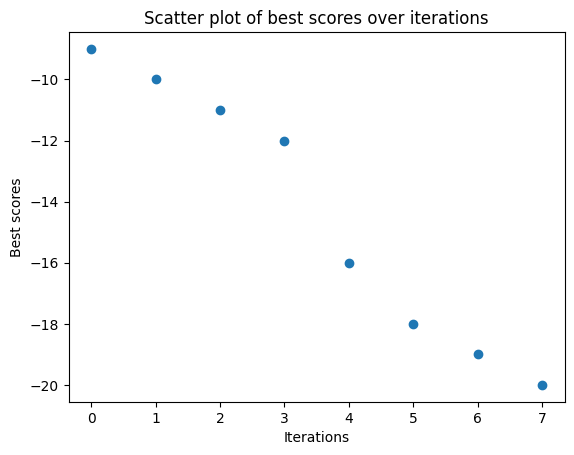

In [17]:
import matplotlib.pyplot as plt

# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)

# objective function
def onemax(x):
    return -sum(x)

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    best_scores = []
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
                best_scores.append(best_eval)
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval, best_scores]

# perform the genetic algorithm search
best, score, best_scores = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)

# plot the best scores over iterations
plt.scatter(x=range(len(best_scores)), y=best_scores)
plt.title('Scatter plot of best scores over iterations')
plt.xlabel('Iterations')
plt.ylabel('Best scores')
plt.show()


>0, new best f([1, 0, 1]) = 5.490
>0, new best f([0, 0, 0]) = 4.500
>2, new best f([0, 0, 1]) = 4.490


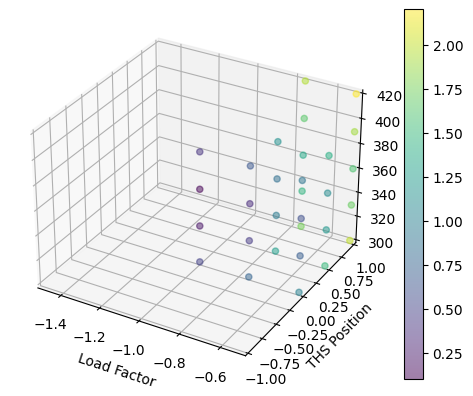

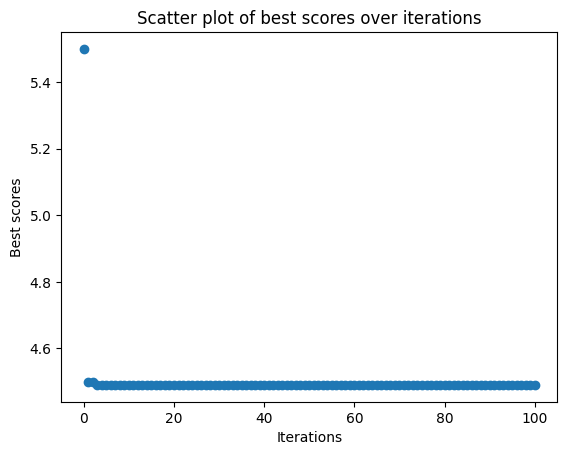

In [21]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

# Define the objective function for optimization
def objective(x):
    LF = x[0]
    THS = x[1]
    V = x[2]
    LF_lim = -1.0
    THS_trim = 0.0
    THS_range = 1.0
    V_stab = 350.0
    V_range = 100.0
    w1 = 1.0
    w2 = 1.0
    w3 = 1.0
    return w1*abs((LF-LF_lim)/LF_lim) + w2*abs((THS-THS_trim)/THS_range) + w3*abs((V-V_stab)/V_range)

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-1)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution and score in each iteration
    best, best_eval = 0, objective(pop[0])
    best_scores = [best_eval]
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
        # add best score to list
        best_scores.append(best_eval)
    return [best, best_eval, best_scores]


# define the total iterations
n_iter = 100
# bits
n_bits = 3
# define the population size
n_pop = 10
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# perform the genetic algorithm search
best, score, best_scores = genetic_algorithm(objective,n_bits, n_iter, n_pop, r_cross, r_mut)

# Plot the results
LF_range = np.linspace(-1.5, -0.5, 5)
THS_range = np.linspace(-1.0, 1.0, 5)
V_range = np.linspace(300.0, 420.0, 5)

results = {}
for LF in LF_range:
    for THS in THS_range:
        for V in V_range:
            x = [LF, THS, V]
            f = objective(x)
            results[f] = x

fig = plt.figure()
ax = plt.axes(projection='3d')
x = [results[key][0] for key in sorted(results.keys())]
y = [results[key][1] for key in sorted(results.keys())]
z = [results[key][2] for key in sorted(results.keys())]
c = sorted(results.keys())
sc = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)
ax.set_xlabel('Load Factor')
ax.set_ylabel('THS Position')
ax.set_zlabel('Airspeed')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(300.0, 420.0)
fig.colorbar(sc)
plt.show()

# plot the best scores over iterations
plt.scatter(x=range(len(best_scores)), y=best_scores)
plt.title('Scatter plot of best scores over iterations')
plt.xlabel('Iterations')
plt.ylabel('Best scores')
plt.show()
